## **Moving Average Convergence/Divergence (MACD)** for trading strategy of crypto 
* Is a trend following momentum indicator i.e. it looks at an asset's momentum to determine if its up or down
* Consists of two moving averages and an histogram
* If the 2 moving averages are moving closer together it is said to be *converging* and if they are moving away from each other it is said to be *diverging*
* The difference of the lines is represented by the histogram
* **Crossovers**: buy signals occur when the more reactive line (MACD) line crosses the slower/less reactive line (signal) and sell signals occur when the MACD line crosses below the signal 
* **Histogram reversals**: When the market price is moving strongly in a direction, the histogram will increase in height, and when the histogram shrinks, it is a sign the market is moving slower 
* **Zero crosses** if MACD line crosses the zero line from below an uptrend might be emerging and if it crosses from above then a downtrend could be emerging
*Source: https://www.ig.com/uk/trading-strategies/macd-trading-strategy-190610#:~:text=The%20strategy%20is%20to%20buy,the%20signals%20issued%20too%20late.*

*Source for code: https://www.youtube.com/watch?v=kz_NJERCgm8&ab_channel=ComputerScience*

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# Read the file in from device
df = pd.read_csv('BTC_INR.csv')

In [4]:
# Change the index to the date
df = df.set_index(pd.DatetimeIndex(df['Date'].values)) 

In [11]:
df.index.name = 'Date'
df.drop(columns=['Date'], inplace=True)

In [13]:
# Check the first few rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12


In [20]:
# Check of null values in the data
filt = df['Open'].isnull()

In [17]:
df[filt]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-04,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()

## Visualise the data

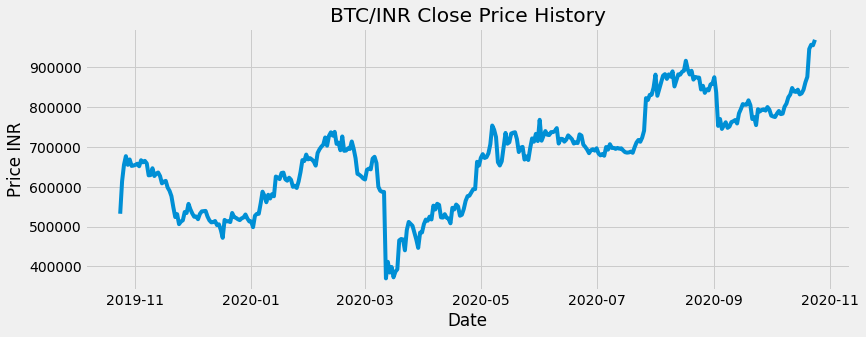

In [21]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('BTC/INR Close Price History')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()

## Calculate the MACD and Signal lines

In [26]:
# Calculate the short term exponetial moving average (EMA) - 12 periods
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponetial moving average (EMA) - 26 periods
LongEMA = df.Close.ewm(span=26, adjust = False).mean()
# Calculate the MACD line
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

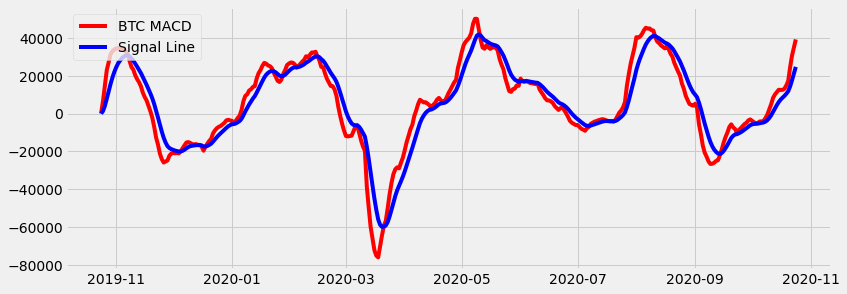

In [27]:
# plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'BTC MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
plt.legend(loc='upper left')
plt.show()

In [28]:
df['MACD'] = MACD
df['Signal'] = signal
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
Date,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12,0.000000,0.000000
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12,6494.599003,1298.919801
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12,14810.693959,4001.274632
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12,22890.787513,7779.177208
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12,27220.148844,11667.371535


In [34]:
# Create a function - when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1 # Tells us if the price continues to rise or decreases - flag changes when the two lines cross again

    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal'][i]: # MACD has crossed the signal line
            Sell.append(np.nan)
            if flag != 1: # We have not been here before
                Buy.append(signal['Close'][i])
                flag = 1 # We have been here
            else:
                Buy.append(np.nan)
        
        elif signal['MACD'][i] < signal['Signal'][i]: # Signal line has crossed the MACD line
            Buy.append(np.nan)
            if flag != 0: # We have not been here before but different value than previous
                Sell.append(signal['Close'][i])
                flag = 0 # We have been here - change flag to 0
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
    
    return (Buy, Sell)

In [36]:
# Create a buy and sell column in the dataframe
a = buy_sell(df)
df['Buy_Signal_Price']= a[0]
df['Sell_Signal_Price'] = a[1]

In [37]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12,0.000000,0.000000,NaN,NaN
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12,6494.599003,1298.919801,613524.0625,NaN
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12,14810.693959,4001.274632,NaN,NaN
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12,22890.787513,7779.177208,NaN,NaN
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12,27220.148844,11667.371535,NaN,NaN


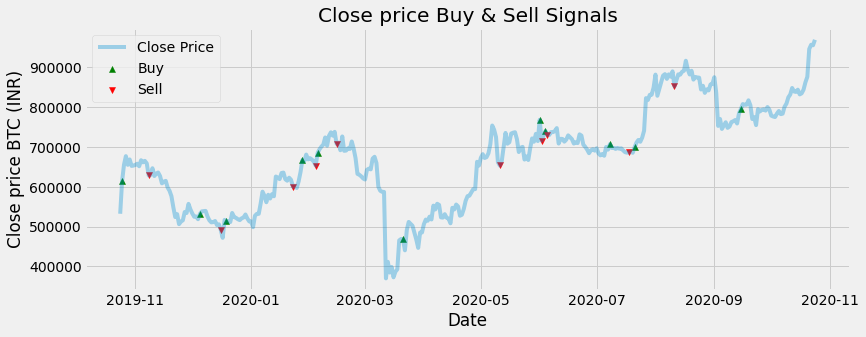

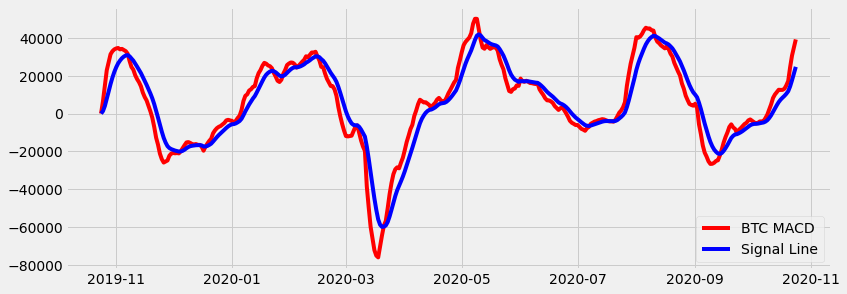

In [40]:
# Visualise the signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker = '^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker = 'v', alpha =1)
plt.plot(df['Close'], label = 'Close Price', alpha = 0.35)
plt.title('Close price Buy & Sell Signals')
plt.xlabel('Date')
plt.ylabel('Close price BTC (INR)')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label = 'BTC MACD', color = 'red')
plt.plot(df.index, signal, label = 'Signal Line', color = 'blue')
plt.legend(loc='lower right')
plt.show()

In [42]:
buy_signal_entries = df[df.Buy_Signal_Price.notna()].copy()
buy_signal_entries

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2019-10-25,531911.81250,615708.68750,529882.06250,613524.06250,613524.06250,2.033467e+12,6494.599003,1298.919801,613524.06250,NaN
2019-12-05,518535.03125,552842.25000,516376.93750,531771.87500,531771.87500,1.343374e+12,-19881.058264,-20031.466699,531771.87500,NaN
2019-12-19,516708.28125,523310.96875,501569.62500,513070.84375,513070.84375,1.845229e+12,-15884.561023,-17106.197758,513070.84375,NaN
2020-01-28,636799.87500,666709.68750,634641.31250,666709.68750,666709.68750,2.450580e+12,21025.403221,19916.542325,666709.68750,NaN
2020-02-05,653032.68750,690635.56250,652364.12500,684379.68750,684379.68750,2.507459e+12,25165.314059,24610.205148,684379.68750,NaN
2020-03-21,469353.31250,482331.15625,448655.53125,467730.81250,467730.81250,3.213536e+12,-59261.912851,-59773.278799,467730.81250,NaN
2020-06-01,714721.75000,770001.87500,713482.37500,767767.00000,767767.00000,2.657996e+12,18499.644412,17130.980596,767767.00000,NaN
2020-06-04,727355.75000,745624.75000,719737.18750,739536.43750,739536.43750,1.956008e+12,17345.862656,17122.500892,739536.43750,NaN
2020-07-08,693084.93750,708260.50000,692829.62500,706560.62500,706560.62500,1.476498e+12,-5403.844623,-6323.826007,706560.62500,NaN


In [45]:
buy_price_high = buy_signal_entries['High'].values
buy_price_high

array([615708.6875 , 552842.25   , 523310.96875, 666709.6875 ,
       690635.5625 , 482331.15625, 770001.875  , 745624.75   ,
       708260.5    , 701946.875  , 805171.375  ])

In [46]:
sell_signal_entries = df[df.Sell_Signal_Price.notna()].copy()
sell_signal_entries

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2019-11-08,658276.62500,661861.7500,626371.3125,628466.00000,628466.00000,1.736819e+12,27892.536904,30303.442321,NaN,628466.00000
2019-12-16,505668.96875,508462.7500,489497.0000,491538.84375,491538.84375,1.433196e+12,-17510.831836,-16835.176021,NaN,491538.84375
2020-01-23,617277.56250,619705.5625,594446.6250,599645.06250,599645.06250,1.838248e+12,21524.666808,22375.186546,NaN,599645.06250
2020-02-04,662803.56250,663546.3125,648012.0000,652858.25000,652858.25000,2.125704e+12,24298.707433,24471.427920,NaN,652858.25000
2020-02-15,737718.18750,739699.4375,706287.1875,707359.87500,707359.87500,3.137531e+12,30187.790951,30241.518935,NaN,707359.87500
2020-05-11,661337.50000,685381.1875,636116.9375,653199.75000,653199.75000,4.337545e+12,38908.961601,41284.054277,NaN,653199.75000
2020-06-02,767442.68750,763553.9375,709429.8750,715364.75000,715364.75000,2.937879e+12,17124.840384,17129.752554,NaN,715364.75000
2020-06-05,739504.68750,745899.2500,730684.6250,730371.12500,730371.12500,1.776493e+12,16833.525674,17064.705848,NaN,730371.12500
2020-07-18,685401.18750,691377.9375,681629.3750,685989.56250,685989.56250,9.176897e+11,-4140.933266,-3981.263862,NaN,685989.56250


In [47]:
sell_price_low = sell_signal_entries['Low'].values
sell_price_low

array([626371.3125, 489497.    , 594446.625 , 648012.    , 706287.1875,
       636116.9375, 709429.875 , 730684.625 , 681629.375 , 836220.375 ])

In [48]:
def get_trade_value(buy_price, sell_price, stake):
    ''' Calculates the profit/loss of a sale given 
        the purchase price of an asset (buy_price), 
        the sales price of the asset (sell_price) &
        and the amount invested in the asset'''
    BTC_one_INR = 1/buy_price
    amount_purchased = BTC_one_INR * stake
    sales_value = amount_purchased * sell_price
    return round(sales_value - stake,2)

In [49]:
# Get the buy-sell price pairs in the order the buy buy-sell signals came in 
buy_sell_pairs = [[buy_price_high[i], sell_price_low[i]] for i in range(min(len(buy_price_high), (len(sell_price_low))))]

In [50]:
# Get the profit/loss of executing the buy-sell for 
stake_bid = 10000 
sale_values = [get_trade_value(b,s,stake_bid) for b,s in buy_sell_pairs]
sale_values

[173.18,
 -1145.81,
 1359.34,
 -280.45,
 226.63,
 3188.39,
 -786.65,
 -200.37,
 -376.01,
 1912.87]

In [53]:
print(f'We would have made INR {np.sum(sale_values)} by following MACD strategy and staking INR {stake_bid:,} each on {len(sale_values)} trades over a period of a year.\nThis would have yielded a ROI of {round(np.sum(sale_values)/(stake_bid* len(sale_values))*100,2)}%.\nThis does not take into account exchange fees')

We would have made INR 4071.12 by following MACD strategy and staking INR 10,000 each on 10 trades over a period of a year.
This would have yielded a ROI of 4.07%.
This does not take into account exchange fees


Future work: add histogram and zero line